In [ ]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, ARDRegression
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import GridSearchCV
import numpy as np

# Part 1: Machine Learning Modeling
This part involves making different machine learning models and finding the best one for predicting test error using cross-validation and rmse.

In [ ]:
# import cleaned csvs
df_anime = pd.read_csv('anime_ml.csv')
df_anime = df_anime.set_index('id')

df_test = pd.read_csv('tanime_ml.csv')
df_test = df_test.set_index('id')

In [ ]:
df_anime.head()

,title,synopsis,source,rating,popularity,num_list_users,num_episodes,media_type,mean,Action,...,Studio 3Hz,Studio Colorido,Studio Gokumi,Studio Jemi,Studio Kai,Sunrise,TMS Entertainment,Yumeta Company,Zexcs,feel.
id,,,,,,,,,,,,,,,,,,,,,
21,One Piece,"Gol D. Roger was known as the ""Pirate King,"" t...",manga,pg_13,26,1882485,0,tv,8.65,1,...,0,0,0,0,0,0,0,0,0,0
50265,Spy x Family,"Corrupt politicians, frenzied nationalists, an...",manga,pg_13,197,743717,12,tv,9.04,1,...,0,0,0,0,0,0,0,0,0,0
50160,Kingdom 4th Season,Following the conclusion of the large-scale co...,manga,r,3723,26245,26,tv,8.81,1,...,0,0,0,0,0,0,0,0,0,0
48916,Love Live! Nijigasaki Gakuen School Idol Douko...,Second season of Love Live! Nijigasaki Gakuen ...,other,pg_13,3848,24677,13,tv,7.93,0,...,0,0,0,0,0,1,0,0,0,0
49570,Wu Dong Qian Kun 3rd Season,Lin Dong continues his journey to find the anc...,novel,pg_13,10768,1416,12,ona,7.08,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_test.head()

,title,synopsis,source,rating,popularity,num_list_users,num_episodes,media_type,mean,Action,...,Studio 3Hz,Studio Colorido,Studio Gokumi,Studio Jemi,Studio Kai,Sunrise,TMS Entertainment,Yumeta Company,Zexcs,feel.
id,,,,,,,,,,,,,,,,,,,,,
51805,Ginga Eiyuu Densetsu: Die Neue These - Sakubou,Fourth season of Ginga Eiyuu Densetsu: Die Neu...,novel,r,8408,3493,3,movie,NaN,0,...,0,0,0,0,0,0,0,0,0,0
50379,Shoot! Goal to the Future,Atsushi Kamiya is a former captain at Kakegawa...,original,pg_13,8202,3776,0,tv,NaN,0,...,0,0,0,0,0,0,0,0,0,0
50470,Kami Kuzu☆Idol,"Yuuya, one half of the boy pop duo ZINGS, may ...",manga,pg_13,8443,3451,0,tv,NaN,0,...,0,0,1,0,0,0,0,0,0,0
48573,Uta no☆Prince-sama♪ Movie: Maji Love ST☆RISH T...,The first installment of the new Uta no☆Prince...,game,pg_13,8496,3356,1,movie,NaN,0,...,0,0,0,0,0,0,0,0,0,0
51251,D4DJ: Double Mix,A special episode focusing on the story of Mer...,mixed_media,pg_13,9600,2213,1,special,NaN,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_test_results = df_test[['title']].copy(deep=True)
scores_dict = {}

In [ ]:
# Model 1: KNN model with only media type

med_pipeline = make_pipeline(
    # replace nan values with the most frequent
    (SimpleImputer(strategy='most_frequent')),
    (OneHotEncoder(handle_unknown='ignore'))
)

# Create pipeline
ct = make_column_transformer(
     (med_pipeline, ['media_type'])
)

pipeline = make_pipeline(
    ct,
    KNeighborsRegressor(n_neighbors=27)
)

X_train = df_anime[['media_type']]
X_test = df_test[['media_type']]
y_train = df_anime['mean']

pipeline.fit(X=X_train, 
             y=y_train)

# Make predictions
df_test_results['mean1'] = pipeline.predict(X=X_test)

# calculate cross validation score
scores = -cross_val_score(pipeline, 
                          X=X_train,
                          y=y_train,
                          scoring="neg_mean_squared_error",
                          cv=10)
scores_dict['model1'] = np.sqrt(scores.mean())

In [ ]:
# Model 2: KNN Model with Title and media type

med_pipeline = make_pipeline(
    (SimpleImputer(strategy='most_frequent')),
    (OneHotEncoder(handle_unknown='ignore'))
)

ct = make_column_transformer(
     (med_pipeline, ['media_type']),
     (TfidfVectorizer(norm=False, max_features=100), 'title')
)

pipeline = make_pipeline(
    ct,
    KNeighborsRegressor(n_neighbors=19)
)

X_train = df_anime[['media_type', 'title']]
X_test = df_test[['media_type', 'title']]
y_train = df_anime['mean']

pipeline.fit(X=X_train, 
             y=y_train)

df_test_results['mean2'] = pipeline.predict(X=X_test)
scores = -cross_val_score(pipeline, 
                          X=X_train,
                          y=y_train,
                          scoring="neg_mean_squared_error",
                          cv=10)
scores_dict['model2'] = np.sqrt(scores.mean())

In [ ]:
# Model 3: KNN Model with Title, synopsis, and media type

med_pipeline = make_pipeline(
    (SimpleImputer(strategy='most_frequent')),
    (OneHotEncoder(handle_unknown='ignore'))
)

# Impute NaN values and use TfidfVectorizer
syn_pipeline = make_pipeline(
    (SimpleImputer(strategy='most_frequent')),
    (FunctionTransformer(np.reshape, kw_args={'newshape':-1})),
    (TfidfVectorizer(norm=False, max_features=100))
)

ct = make_column_transformer(
     (med_pipeline, ['media_type']),
     (TfidfVectorizer(norm=False, max_features=100), 'title'),
     (syn_pipeline, ['synopsis']),
)

pipeline = make_pipeline(
    ct,
    KNeighborsRegressor(n_neighbors=22)
)

X_train = df_anime[['media_type', 'title', 'synopsis']]
X_test = df_test[['media_type', 'title', 'synopsis']]
y_train = df_anime['mean']

pipeline.fit(X=X_train, 
             y=y_train)

df_test_results['mean3'] = pipeline.predict(X=X_test)
scores = -cross_val_score(pipeline, 
                          X=X_train,
                          y=y_train,
                          scoring="neg_mean_squared_error",
                          cv=10)
scores_dict['model3'] = np.sqrt(scores.mean())

In [ ]:
# Model 4: KNN Model with Title, synopsis, media type, and genres

med_pipeline = make_pipeline(
    (SimpleImputer(strategy='most_frequent')),
    (OneHotEncoder(handle_unknown='ignore'))
)

syn_pipeline = make_pipeline(
    (SimpleImputer(strategy='most_frequent')),
    (FunctionTransformer(np.reshape, kw_args={'newshape':-1})),
    (TfidfVectorizer(norm=False, max_features=100))
)

ct = make_column_transformer(
     (med_pipeline, ['media_type']),
     (TfidfVectorizer(norm=False, max_features=100), 'title'),
     (syn_pipeline, ['synopsis']),
     (StandardScaler(), df_anime.columns[9:22]) # genres
)

pipeline = make_pipeline(
    ct,
    KNeighborsRegressor(n_neighbors=15)
)

cols = ['media_type', 'title', 'synopsis']
cols.extend(df_anime.columns[9:22])

X_train = df_anime[cols]
X_test = df_test[cols]
y_train = df_anime['mean']

pipeline.fit(X=X_train, 
             y=y_train)

df_test_results['mean4'] = pipeline.predict(X=X_test)
scores = -cross_val_score(pipeline, 
                          X=X_train,
                          y=y_train,
                          scoring="neg_mean_squared_error",
                          cv=10)
scores_dict['model4'] = np.sqrt(scores.mean())

In [ ]:
# Model 5: KNN Model with Title, synopsis, media type, and genres, demographics

med_pipeline = make_pipeline(
    (SimpleImputer(strategy='most_frequent')),
    (OneHotEncoder(handle_unknown='ignore'))
)

syn_pipeline = make_pipeline(
    (SimpleImputer(strategy='most_frequent')),
    (FunctionTransformer(np.reshape, kw_args={'newshape':-1})),
    (TfidfVectorizer(norm=False, max_features=100))
)

ct = make_column_transformer(
     (med_pipeline, ['media_type']),
     (TfidfVectorizer(norm=False, max_features=100), 'title'),
     (syn_pipeline, ['synopsis']),
     (StandardScaler(), df_anime.columns[9:27]) # genres and demographics
)

pipeline = make_pipeline(
    ct,
    KNeighborsRegressor(n_neighbors=15)
)

cols = ['media_type', 'title', 'synopsis']
cols.extend(df_anime.columns[9:27])

X_train = df_anime[cols]
X_test = df_test[cols]
y_train = df_anime['mean']

pipeline.fit(X=X_train, 
             y=y_train)

df_test_results['mean5'] = pipeline.predict(X=X_test)
scores = -cross_val_score(pipeline, 
                          X=X_train,
                          y=y_train,
                          scoring="neg_mean_squared_error",
                          cv=10)
scores_dict['model5'] = np.sqrt(scores.mean())

In [ ]:
# Model 6: KNN Model with Title, synopsis, media type, and genres, themes

med_pipeline = make_pipeline(
    (SimpleImputer(strategy='most_frequent')),
    (OneHotEncoder(handle_unknown='ignore'))
)

syn_pipeline = make_pipeline(
    (SimpleImputer(strategy='most_frequent')),
    (FunctionTransformer(np.reshape, kw_args={'newshape':-1})),
    (TfidfVectorizer(norm=False, max_features=100))
)

ct = make_column_transformer(
     (med_pipeline, ['media_type']),
     (TfidfVectorizer(norm=False, max_features=100), 'title'),
     (syn_pipeline, ['synopsis']),
     (StandardScaler(), df_anime.columns[9:56].drop(
         ['Josei', 'Kids', 'Shounen', 'Shoujo', 'Seinen'])) # genres and themes
)

pipeline = make_pipeline(
    ct,
    KNeighborsRegressor(n_neighbors=12)
)

cols = ['media_type', 'title', 'synopsis']
cols.extend(df_anime.columns[9:56].drop(
    ['Josei', 'Kids', 'Shounen', 'Shoujo', 'Seinen']))

X_train = df_anime[cols]
X_test = df_test[cols]
y_train = df_anime['mean']

pipeline.fit(X=X_train, 
             y=y_train)

df_test_results['mean6'] = pipeline.predict(X=X_test)
scores = -cross_val_score(pipeline, 
                          X=X_train,
                          y=y_train,
                          scoring="neg_mean_squared_error",
                          cv=10)
scores_dict['model6'] = np.sqrt(scores.mean())

In [ ]:
# Model 7: KNN Model with Title, synopsis, media type, genres, themes, studios

med_pipeline = make_pipeline(
    (SimpleImputer(strategy='most_frequent')),
    (OneHotEncoder(handle_unknown='ignore'))
)

syn_pipeline = make_pipeline(
    (SimpleImputer(strategy='most_frequent')),
    (FunctionTransformer(np.reshape, kw_args={'newshape':-1})),
    (TfidfVectorizer(norm=False, max_features=100))
)

ct = make_column_transformer(
     (med_pipeline, ['media_type']),
     (TfidfVectorizer(norm=False, max_features=100), 'title'),
     (syn_pipeline, ['synopsis']),
     (StandardScaler(), df_anime.columns[9:].drop(
         ['Josei', 'Kids', 'Shounen', 'Shoujo', 'Seinen'])) # genres, themes, studios
)

pipeline = make_pipeline(
    ct,
    KNeighborsRegressor(n_neighbors=11)
)

cols = ['media_type', 'title', 'synopsis']
cols.extend(df_anime.columns[9:].drop(
    ['Josei', 'Kids', 'Shounen', 'Shoujo', 'Seinen']))

X_train = df_anime[cols]
X_test = df_test[cols]
y_train = df_anime['mean']

pipeline.fit(X=X_train, 
             y=y_train)

df_test_results['mean7'] = pipeline.predict(X=X_test)
scores = -cross_val_score(pipeline, 
                          X=X_train,
                          y=y_train,
                          scoring="neg_mean_squared_error",
                          cv=10)
scores_dict['model7'] = np.sqrt(scores.mean())

In [ ]:
# Model 8: KNN Model with Title, synopsis, media type, and genres, themes, rating

med_pipeline = make_pipeline(
    (SimpleImputer(strategy='most_frequent')),
    (OneHotEncoder(handle_unknown='ignore'))
)

syn_pipeline = make_pipeline(
    (SimpleImputer(strategy='most_frequent')),
    (FunctionTransformer(np.reshape, kw_args={'newshape':-1})),
    (TfidfVectorizer(norm=False, max_features=100))
)

ct = make_column_transformer(
     (med_pipeline, ['media_type', 'rating']),
     (TfidfVectorizer(norm=False, max_features=100), 'title'),
     (syn_pipeline, ['synopsis']),
     (StandardScaler(), df_anime.columns[9:56].drop(
         ['Josei', 'Kids', 'Shounen', 'Shoujo', 'Seinen'])) # genres and themes
)

pipeline = make_pipeline(
    ct,
    KNeighborsRegressor(n_neighbors=11)
)

cols = ['media_type', 'title', 'synopsis', 'rating']
cols.extend(df_anime.columns[9:56].drop(
    ['Josei', 'Kids', 'Shounen', 'Shoujo', 'Seinen']))

X_train = df_anime[cols]
X_test = df_test[cols]
y_train = df_anime['mean']

pipeline.fit(X=X_train, 
             y=y_train)

df_test_results['mean8'] = pipeline.predict(X=X_test)
scores = -cross_val_score(pipeline, 
                          X=X_train,
                          y=y_train,
                          scoring="neg_mean_squared_error",
                          cv=10)
scores_dict['model8'] = np.sqrt(scores.mean())

In [ ]:
# Model 9: KNN Model with Title, synopsis, media type, and genres, themes, rating,
# and source

med_pipeline = make_pipeline(
    (SimpleImputer(strategy='most_frequent')),
    (OneHotEncoder(handle_unknown='ignore'))
)

syn_pipeline = make_pipeline(
    (SimpleImputer(strategy='most_frequent')),
    (FunctionTransformer(np.reshape, kw_args={'newshape':-1})),
    (TfidfVectorizer(norm=False, max_features=100))
)

ct = make_column_transformer(
     (med_pipeline, ['media_type', 'rating', 'source']),
     (TfidfVectorizer(norm=False, max_features=100), 'title'),
     (syn_pipeline, ['synopsis']),
     (StandardScaler(), df_anime.columns[9:56].drop(
         ['Josei', 'Kids', 'Shounen', 'Shoujo', 'Seinen'])) # genres and themes
)

pipeline = make_pipeline(
    ct,
    KNeighborsRegressor(n_neighbors=11)
)

cols = ['media_type', 'title', 'synopsis', 'rating', 'source']
cols.extend(df_anime.columns[9:56].drop(
    ['Josei', 'Kids', 'Shounen', 'Shoujo', 'Seinen']))

X_train = df_anime[cols]
X_test = df_test[cols]
y_train = df_anime['mean']

pipeline.fit(X=X_train, 
             y=y_train)

df_test_results['mean9'] = pipeline.predict(X=X_test)
scores = -cross_val_score(pipeline, 
                          X=X_train,
                          y=y_train,
                          scoring="neg_mean_squared_error",
                          cv=10)
scores_dict['model9'] = np.sqrt(scores.mean())

In [ ]:
# Model 10: KNN Model with Title, synopsis, media type, and genres, themes, rating,
# and popularity

med_pipeline = make_pipeline(
    (SimpleImputer(strategy='most_frequent')),
    (OneHotEncoder(handle_unknown='ignore'))
)

num_pipeline = make_pipeline(
    (SimpleImputer(strategy='mean')),
    (StandardScaler())
)

syn_pipeline = make_pipeline(
    (SimpleImputer(strategy='most_frequent')),
    (FunctionTransformer(np.reshape, kw_args={'newshape':-1})),
    (TfidfVectorizer(norm=False, max_features=100))
)

ct = make_column_transformer(
     (med_pipeline, ['media_type', 'rating']),
     (num_pipeline, ['popularity']),
     (TfidfVectorizer(norm=False, max_features=100), 'title'),
     (syn_pipeline, ['synopsis']),
     (StandardScaler(), df_anime.columns[9:56].drop(
         ['Josei', 'Kids', 'Shounen', 'Shoujo', 'Seinen'])) # genres and themes
)

pipeline = make_pipeline(
    ct,
    KNeighborsRegressor(n_neighbors=8)
)

cols = ['media_type', 'title', 'synopsis', 'rating', 'popularity']
cols.extend(df_anime.columns[9:56].drop(
    ['Josei', 'Kids', 'Shounen', 'Shoujo', 'Seinen']))

X_train = df_anime[cols]
X_test = df_test[cols]
y_train = df_anime['mean']

pipeline.fit(X=X_train, 
             y=y_train)

df_test_results['mean10'] = pipeline.predict(X=X_test)
scores = -cross_val_score(pipeline, 
                          X=X_train,
                          y=y_train,
                          scoring="neg_mean_squared_error",
                          cv=10)
scores_dict['model10'] = np.sqrt(scores.mean())

In [ ]:
# Model 11: KNN Model with Title, synopsis, media type, and genres, themes, rating,
# and popularity, num_list_users

med_pipeline = make_pipeline(
    (SimpleImputer(strategy='most_frequent')),
    (OneHotEncoder(handle_unknown='ignore'))
)

num_pipeline = make_pipeline(
    (SimpleImputer(strategy='mean')),
    (StandardScaler())
)

syn_pipeline = make_pipeline(
    (SimpleImputer(strategy='most_frequent')),
    (FunctionTransformer(np.reshape, kw_args={'newshape':-1})),
    (TfidfVectorizer(norm=False, max_features=100))
)

ct = make_column_transformer(
     (med_pipeline, ['media_type', 'rating']),
     (num_pipeline, ['popularity', 'num_list_users']),
     (TfidfVectorizer(norm=False, max_features=100), 'title'),
     (syn_pipeline, ['synopsis']),
     (StandardScaler(), df_anime.columns[9:56].drop(
         ['Josei', 'Kids', 'Shounen', 'Shoujo', 'Seinen'])) # genres and themes
)

pipeline = make_pipeline(
    ct,
    KNeighborsRegressor(n_neighbors=8)
)

cols = ['media_type', 'title', 'synopsis', 'rating', 'popularity', 
        'num_list_users']
cols.extend(df_anime.columns[9:56].drop(
    ['Josei', 'Kids', 'Shounen', 'Shoujo', 'Seinen']))

X_train = df_anime[cols]
X_test = df_test[cols]
y_train = df_anime['mean']

pipeline.fit(X=X_train, 
             y=y_train)

df_test_results['mean11'] = pipeline.predict(X=X_test)
scores = -cross_val_score(pipeline, 
                          X=X_train,
                          y=y_train,
                          scoring="neg_mean_squared_error",
                          cv=10)
scores_dict['model11'] = np.sqrt(scores.mean())

In [ ]:
# Model 12: KNN Model with Title, synopsis, media type, and genres, themes, 
# rating, and popularity, num_list_users, num_episodes

med_pipeline = make_pipeline(
    (SimpleImputer(strategy='most_frequent')),
    (OneHotEncoder(handle_unknown='ignore'))
)

num_pipeline = make_pipeline(
    (SimpleImputer(strategy='mean')),
    (StandardScaler())
)

syn_pipeline = make_pipeline(
    (SimpleImputer(strategy='most_frequent')),
    (FunctionTransformer(np.reshape, kw_args={'newshape':-1})),
    (TfidfVectorizer(norm=False, max_features=100))
)

ct = make_column_transformer(
     (med_pipeline, ['media_type', 'rating']),
     (num_pipeline, ['popularity', 'num_list_users', 'num_episodes']),
     (TfidfVectorizer(norm=False, max_features=100), 'title'),
     (syn_pipeline, ['synopsis']),
     (StandardScaler(), df_anime.columns[9:56].drop(
         ['Josei', 'Kids', 'Shounen', 'Shoujo', 'Seinen'])) # genres and themes
)

pipeline = make_pipeline(
    ct,
    KNeighborsRegressor(n_neighbors=8)
)

cols = ['media_type', 'title', 'synopsis', 'rating', 'popularity', 
        'num_list_users', 'num_episodes']
cols.extend(df_anime.columns[9:56].drop(
    ['Josei', 'Kids', 'Shounen', 'Shoujo', 'Seinen']))

X_train = df_anime[cols]
X_test = df_test[cols]
y_train = df_anime['mean']

pipeline.fit(X=X_train, 
             y=y_train)

df_test_results['mean12'] = pipeline.predict(X=X_test)
scores = -cross_val_score(pipeline, 
                          X=X_train,
                          y=y_train,
                          scoring="neg_mean_squared_error",
                          cv=10)
scores_dict['model12'] = np.sqrt(scores.mean())

In [ ]:
# Model 13: Linear Regression with Title, synopsis, media type, and genres, themes, 
# rating, and popularity, num_list_users

med_pipeline = make_pipeline(
    (SimpleImputer(strategy='most_frequent')),
    (OneHotEncoder(handle_unknown='ignore'))
)

num_pipeline = make_pipeline(
    (SimpleImputer(strategy='mean')),
    (StandardScaler())
)

syn_pipeline = make_pipeline(
    (SimpleImputer(strategy='most_frequent')),
    (FunctionTransformer(np.reshape, kw_args={'newshape':-1})),
    (TfidfVectorizer(norm=False, max_features=100))
)

ct = make_column_transformer(
     (med_pipeline, ['media_type', 'rating']),
     (num_pipeline, ['popularity', 'num_list_users']),
     (TfidfVectorizer(norm=False, max_features=100), 'title'),
     (syn_pipeline, ['synopsis']),
     (StandardScaler(), df_anime.columns[9:56].drop(
         ['Josei', 'Kids', 'Shounen', 'Shoujo', 'Seinen'])) # genres and themes
)

pipeline = make_pipeline(
    ct,
    LinearRegression()
)

cols = ['media_type', 'title', 'synopsis', 'rating', 'popularity', 
        'num_list_users']
cols.extend(df_anime.columns[9:56].drop(
    ['Josei', 'Kids', 'Shounen', 'Shoujo', 'Seinen']))

X_train = df_anime[cols]
X_test = df_test[cols]
y_train = df_anime['mean']

pipeline.fit(X=X_train, 
             y=y_train)

df_test_results['mean13'] = pipeline.predict(X=X_test)
scores = -cross_val_score(pipeline, 
                          X=X_train,
                          y=y_train,
                          scoring="neg_mean_squared_error",
                          cv=10)
scores_dict['model13'] = np.sqrt(scores.mean())

In [ ]:
# Model 14: KNN with Title, synopsis, media type, and genres, themes, 
# rating, and popularity, num_list_users (StandardScaler->MinMaxScaler)

med_pipeline = make_pipeline(
    (SimpleImputer(strategy='most_frequent')),
    (OneHotEncoder(handle_unknown='ignore'))
)

num_pipeline = make_pipeline(
    (SimpleImputer(strategy='mean')),
    (MinMaxScaler(feature_range=(0,120)))
)

syn_pipeline = make_pipeline(
    (SimpleImputer(strategy='most_frequent')),
    (FunctionTransformer(np.reshape, kw_args={'newshape':-1})),
    (TfidfVectorizer(norm=False, max_features=100))
)

ct = make_column_transformer(
     (med_pipeline, ['media_type', 'rating']),
     (num_pipeline, ['popularity', 'num_list_users']),
     (TfidfVectorizer(norm=False, max_features=100), 'title'),
     (syn_pipeline, ['synopsis']),
     (StandardScaler(), df_anime.columns[9:56].drop(
         ['Josei', 'Kids', 'Shounen', 'Shoujo', 'Seinen'])) # genres and themes
)

pipeline = make_pipeline(
    ct,
    KNeighborsRegressor(n_neighbors=18)
)

cols = ['media_type', 'title', 'synopsis', 'rating', 'popularity', 
        'num_list_users']
cols.extend(df_anime.columns[9:56].drop(
    ['Josei', 'Kids', 'Shounen', 'Shoujo', 'Seinen']))

X_train = df_anime[cols]
X_test = df_test[cols]
y_train = df_anime['mean']

pipeline.fit(X=X_train, 
             y=y_train)

df_test_results['mean14'] = pipeline.predict(X=X_test)
scores = -cross_val_score(pipeline, 
                          X=X_train,
                          y=y_train,
                          scoring="neg_mean_squared_error",
                          cv=10)
scores_dict['model14'] = np.sqrt(scores.mean())

In [ ]:
# hyperparameter tuning of best model
grid_search = GridSearchCV(pipeline,
                           param_grid={
                               "kneighborsregressor__n_neighbors": range(1, 30)
                           },
                           scoring="neg_mean_squared_error",
                           cv=10)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['media_type', 'rating']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler(feature_range=(0...
       'Gag Humor'

In [ ]:
df_test_results

,title,mean1,mean2,mean3,mean4,mean5,mean6,mean7,mean8,mean9,mean10,mean11,mean12,mean13,mean14
id,,,,,,,,,,,,,,,
51805,Ginga Eiyuu Densetsu: Die Neue These - Sakubou,7.307407,7.048947,6.985455,6.925333,6.950000,6.910833,6.991818,6.847273,6.847273,6.78125,6.78125,6.80500,7.574584,6.978333
50379,Shoot! Goal to the Future,7.300741,6.777368,6.987273,6.730667,6.642000,6.744167,6.781818,6.771818,6.771818,6.81000,6.81000,6.81000,5.722648,6.911111
50470,Kami Kuzu☆Idol,7.300741,6.733158,6.905455,6.866000,6.851333,6.828333,6.843636,6.763636,6.763636,6.69625,6.69625,6.69625,7.686227,6.707778
48573,Uta no☆Prince-sama♪ Movie: Maji Love ST☆RISH T...,7.307407,7.205263,6.891364,6.813333,6.764000,6.776667,6.931818,6.742727,6.742727,6.69500,6.69500,6.69500,6.351544,7.053333
51251,D4DJ: Double Mix,6.618889,6.662105,6.857273,6.874667,6.887333,6.683333,6.878182,6.747273,6.747273,6.81000,6.81000,6.69750,6.270023,6.808889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50339,Kakegurui Twin,6.944815,6.923158,6.826364,6.950667,6.950667,6.957500,6.896364,6.896364,6.896364,6.78125,6.78125,6.78125,5.721147,6.639444
49776,Kumichou Musume to Sewagakari,7.300741,6.995263,6.759091,6.877333,6.885333,7.090833,7.004545,7.102727,7.102727,7.24250,7.24250,7.24250,6.157912,6.890000
49220,Isekai Ojisan,7.300741,6.740000,6.948636,7.130667,7.116000,6.869167,6.886364,6.936364,6.936364,6.93750,6.93750,6.93750,6.311266,6.744444


# Part 2: Model Analysis
This part involves comparing the models above and analyzing the best model.

In [ ]:
pd.Series(scores_dict).sort_values()

model14    0.694926
model11    0.766301
model12    0.767679
model10    0.769765
model8     0.771729
model9     0.772812
model6     0.773686
model7     0.775623
model4     0.777286
model5     0.777769
model3     0.780952
model2     0.785363
model1     0.793634
model13    1.024918
dtype: float64

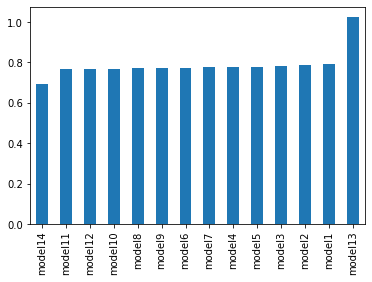

In [ ]:
pd.Series(scores_dict).sort_values().plot.bar()

Model 14, KNN with Title, synopsis, media type, and genres, themes, 
rating, and popularity, num_list_users, with a tweak to the scaler for popularity and num_list_users is the model that yields the lowest rmse of 0.694926. Model 11 and 12 follow closely behind with rmses 0.766301 and 0.767679, respectively.

18    0.694926
19    0.695118
15    0.695754
25    0.697529
27    0.697596
17    0.697928
20    0.698009
28    0.698493
23    0.698677
21    0.698686
14    0.698838
29    0.698976
16    0.698978
24    0.699003
26    0.699235
22    0.700261
13    0.701373
12    0.705996
11    0.707829
10    0.710683
8     0.712387
9     0.712596
7     0.723308
6     0.733037
5     0.744517
4     0.756036
3     0.774074
2     0.823205
1     0.934566
Name: rmse, dtype: float64

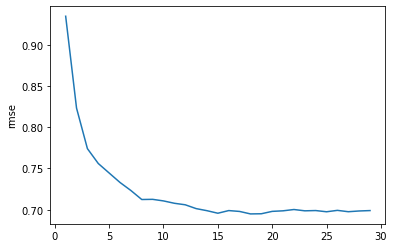

In [ ]:
cols = ['media_type', 'title', 'synopsis', 'rating', 'popularity', 
        'num_list_users']
cols.extend(df_anime.columns[9:56].drop(
    ['Josei', 'Kids', 'Shounen', 'Shoujo', 'Seinen']))

X_train = df_anime[cols]
y_train = df_anime['mean']

# calculate estimate of test error for a value of k
def get_cv_error(k):
  # define pipeline
  med_pipeline = make_pipeline(
    (SimpleImputer(strategy='most_frequent')),
    (OneHotEncoder(handle_unknown='ignore'))
    )
  
  num_pipeline = make_pipeline(
    (SimpleImputer(strategy='mean')),
    (MinMaxScaler(feature_range=(0,120)))
    )
  
  syn_pipeline = make_pipeline(
    (SimpleImputer(strategy='most_frequent')),
    (FunctionTransformer(np.reshape, kw_args={'newshape':-1})),
    (TfidfVectorizer(norm=False, max_features=100))
    )
  
  ct = make_column_transformer(
     (med_pipeline, ['media_type', 'rating']),
     (num_pipeline, ['popularity', 'num_list_users']),
     (TfidfVectorizer(norm=False, max_features=100), 'title'),
     (syn_pipeline, ['synopsis']),
     (StandardScaler(), df_anime.columns[9:56].drop(
         ['Josei', 'Kids', 'Shounen', 'Shoujo', 'Seinen'])) # genres and themes
         )
  
  pipeline = make_pipeline(
      ct,
      KNeighborsRegressor(n_neighbors=k)
      )
  
  # calculate errors from cross-validation
  cv_errs = -cross_val_score(pipeline, X=X_train, y=y_train,
                             scoring="neg_mean_squared_error", cv=10)
  # calculate average of the cross-validation errors
  return np.sqrt(cv_errs.mean())
    
ks = pd.Series(range(1, 30), name='rmse')
ks.index = range(1, 30)
test_errs = ks.apply(get_cv_error)

test_errs.plot.line(ylabel='rmse')
test_errs.sort_values()

Finding the best value for k for model 14, the best value for hyperparameter k is between 15 and 20, which is 18 to be exact.

In [ ]:
df_test_results[['title', 'mean14']].sort_values('mean14', ascending=False).head(10)

,title,mean14
id,,
47164,Dungeon ni Deai wo Motomeru no wa Machigatteir...,7.782222
42963,"Kanojo, Okarishimasu 2nd Season",7.721667
51096,Youkoso Jitsuryoku Shijou Shugi no Kyoushitsu ...,7.683889
48413,Hataraku Maou-sama! 2nd Season,7.675000
48895,Overlord IV,7.664444
50612,Dr. Stone: Ryuusui,7.598889
41084,Made in Abyss: Retsujitsu no Ougonkyou,7.505000
51533,Tonikaku Kawaii: Seifuku,7.470556
38475,Yuru Camp△ Movie,7.412222


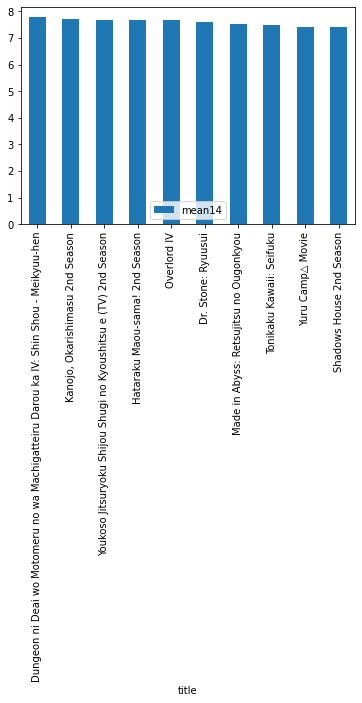

In [ ]:
df_test_results[['title', 'mean14']].set_index('title').sort_values(
    'mean14', ascending=False).head(10).plot.bar()

I'd place my bets on DanMachi (Dungeon ni Deai wo Motomeru...) to be the best anime of the upcoming season, with a mean rating of 7.782222. Kanojo, Okarishimasu 2nd season and Classroom of the Elite (Youkoso Jitsuryoku...) trail pretty close in 2nd and 3rd, respectively. 

For the Fantasy Anime League, I'd put in the top 5 anime (DanMachi, Kanojo, Classroom, Hataraku Maou-sama, and Overlord IV) as my active anime and Dr. Stone: Ryuusui, Made in Abyss, and Tonikaku Kawaii as my bench anime.

# Extra Part: Scratch Work
Below is scratch work on machine learning using a previous setup for genres and studios.

In [ ]:
from collections import defaultdict
import pandas as pd
import numpy as np
import scipy
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from wordcloud import WordCloud
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


In [ ]:
df_animes = pd.read_csv("anime_clean2.csv")
df_animes.head()

,id,title,synopsis,rank,source,rating,popularity,mean,num_list_users,num_scoring_users,...,AXsiZ,Fanworks,Space Neko Company,Vega Entertainment,Bee Media,Shirogumi,DRAWIZ,Quebico,Studio Ponoc,DLE
0,21,One Piece,"Gol D. Roger was known as the ""Pirate King,"" t...",65.0,manga,pg_13,26,8.65,1882485,1070399,...,False,False,False,False,False,False,False,False,False,False
1,50265,Spy x Family,"Corrupt politicians, frenzied nationalists, an...",10.0,manga,pg_13,197,9.04,743717,233149,...,False,False,False,False,False,False,False,False,False,False
2,50160,Kingdom 4th Season,Following the conclusion of the large-scale co...,30.0,manga,r,3723,8.81,26245,3916,...,False,False,False,False,False,False,False,False,False,False
3,48916,Love Live! Nijigasaki Gakuen School Idol Douko...,Second season of Love Live! Nijigasaki Gakuen ...,666.0,other,pg_13,3848,7.93,24677,3332,...,False,False,False,False,False,False,False,False,False,False
4,49570,Wu Dong Qian Kun 3rd Season,Lin Dong continues his journey to find the anc...,3584.0,novel,pg_13,10768,7.08,1416,143,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
all_tags = []
all_tags1 = []
def isNaN(num):
    return num != num

for i in range(len(df_animes)):
 
    if i < 95 and (not isNaN(df_animes.loc[i, 'genre_1'] and df_animes.loc[i, 'genre_2'])):
        all_tags += df_animes.loc[i, 'genre_1']

print('Number of unique Genres: {}'.format(len(set(all_tags))))   

Number of unique Genres: 33


In [ ]:
from collections import Counter

tags_df = pd.DataFrame()

first_n_tags = 200
viable_tags = [tag for tag, value in Counter(all_tags).most_common(first_n_tags)]


for i in range(len(df_animes)):
    tags = df_animes.loc[i, 'genre_2']
    
    if not isNaN(tags):
        for tag in tags:
            if tag in viable_tags:
                tags_df.loc[i, tag] = 1
tags_df.fillna(0, inplace=True)

In [ ]:
warning_df = pd.DataFrame()

all_warnings = []
for i in range(len(df_animes)):
    if not isNaN(df_animes.loc[i, 'rating']):
        all_warnings += df_animes.loc[i, 'rating']
warnings = list(set(all_warnings))

for i in range(len(df_animes)):
    warns = df_animes.loc[i, 'rating']
    
    if not isNaN(warns):
        for warning in warns:
            warning_df.loc[i, 'cw_' + warning] = 1
warning_df.fillna(0, inplace=True)

In [ ]:
warning_df

,cw_p,cw_g,cw__,cw_1,cw_3,cw_r,cw_x,cw_+
0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
895,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
896,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
897,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
898,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_animes = pd.concat([df_animes, tags_df, warning_df], axis=1)


In [ ]:
df_animes

,Unnamed: 0,id,title,synopsis,rank,source,rating,popularity,mean,num_list_users,...,),T,cw_p,cw_g,cw__,cw_1,cw_3,cw_r,cw_x,cw_+
0,0,50380,Paripi Koumei,Zhuge Kongming earned a reputation as one of t...,167.0,manga,pg_13,1354,8.40,138844,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,1,48702,Dance Dance Danseur,Junpei Murao's love affair with ballet began a...,1187.0,manga,pg_13,2742,7.66,46987,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,2,42745,Machikado Mazoku: 2-choume,Second season of Machikado Mazoku.,808.0,4_koma_manga,pg_13,2865,7.85,43079,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
3,3,50160,Kingdom 4th Season,Following the conclusion of the large-scale co...,28.0,manga,r,3788,8.82,25313,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,49320,Detective Conan Movie 25: Halloween no Hanayome,The movie is set to be released during the Gol...,874.0,manga,pg_13,6714,7.81,6312,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,895,41638,Bite-Choicar,Chashin was selected by the legendary choicar ...,16267.0,original,g,15256,NaN,313,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
896,896,41384,Norimono Man: Mobile Land no Car-kun,The anime will depict various vehicles as char...,13349.0,original,pg,15178,NaN,319,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
897,897,49841,Chunqiu Feng Shen,"In the late years of the Western Zhou Dynasty,...",16542.0,NaN,pg_13,15128,NaN,323,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
898,898,45207,Okashi na Sabaku no Suna to Manu,The story centers on the everyday life of the ...,13436.0,manga,pg,10797,NaN,1392,...,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_animes.dropna(subset=['mean'], inplace=True)
features = [ 'title', 'mean','popularity', 'studio_1']  + list(tags_df.columns) + list(warning_df.columns)
#'media_type', 'title', 'mean', 'studio_1', 'popularity', 'related_anime_1'
X_dict = df_animes[features]
y = df_animes['mean']
#z = df_animes['title']

X_train, X_valid, y_train, y_valid = train_test_split(X_dict, y, train_size=0.8, test_size=0.2, random_state=1)
categorical_cols = [ 'studio_1', "title"]
numerical_cols = [ 'popularity', 'mean'] + list(tags_df.columns) + list(warning_df.columns)

In [ ]:
numerical_transformer = SimpleImputer(strategy='most_frequent')


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

In [ ]:
model = LinearRegression()
#model = RandomForestRegressor(max_depth = None, random_state = 0, n_estimators = 100)

In [ ]:
my_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

In [ ]:
my_pipeline.fit(X_train, y_train)
preds = my_pipeline.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, preds))
mae = mean_absolute_error(y_valid, preds)
print('Mean Squared Error: {}'.format(rmse))

In [ ]:
import random
import matplotlib.pyplot as plt
count = random.randint(0,90)
for i in range(count):
    ratio = preds[i] / df_animes['mean'][i]
    average = ratio.mean()
    print('\nTitle: {}\nPredicted: {:.2f} \nReal: {:.2f}\nRatio: {:.4f}'.format(df_animes["title"][i], preds[i], df_animes['mean'][i], ratio))



Title: Paripi Koumei
Predicted: 6.23 
Real: 8.40
Ratio: 0.7416

Title: Dance Dance Danseur
Predicted: 5.48 
Real: 7.66
Ratio: 0.7154

Title: Machikado Mazoku: 2-choume
Predicted: 7.26 
Real: 7.85
Ratio: 0.9249

Title: Kingdom 4th Season
Predicted: 8.53 
Real: 8.82
Ratio: 0.9667

Title: Detective Conan Movie 25: Halloween no Hanayome
Predicted: 7.41 
Real: 7.81
Ratio: 0.9482

Title: Love Live! Nijigasaki Gakuen School Idol Doukoukai 2nd Season
Predicted: 6.15 
Real: 7.94
Ratio: 0.7745

Title: Honzuki no Gekokujou: Shisho ni Naru Tame ni wa Shudan wo Erandeiraremasen 3rd Season
Predicted: 7.09 
Real: 8.00
Ratio: 0.8862

Title: Ao Ashi
Predicted: 6.07 
Real: 7.87
Ratio: 0.7713

Title: Crayon Shin-chan
Predicted: 7.26 
Real: 7.75
Ratio: 0.9373

Title: Date A Live IV
Predicted: 7.66 
Real: 7.84
Ratio: 0.9776

Title: One Piece
Predicted: 6.24 
Real: 8.64
Ratio: 0.7222

Title: Summertime Render
Predicted: 7.17 
Real: 8.36
Ratio: 0.8579

Title: Spy x Family
Predicted: 5.98 
Real: 9.05
Ratio: 

In [ ]:

print('Final Average:', average)

Final Average: 0.715422406851831
